In [1]:
## Pyber ##

# import dependencies here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fetch city data
city_data_pd = pd.read_csv('raw_data/city_data.csv')
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# fetch ride data
ride_data_pd = pd.read_csv('raw_data/ride_data.csv')
ride_data_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# merge city and ride data
city_ride_pd = city_data_pd.merge(ride_data_pd, on='city')
city_ride_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [5]:
# average fare per city
avg_fare_per_city = ride_data_pd.groupby('city', as_index=False)['fare'].mean()
avg_fare_per_city = avg_fare_per_city.rename(columns={'fare':'average fare'})
avg_fare_per_city.head()

,city,average fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [6]:
# total rides per city
total_rides_per_city = ride_data_pd.groupby('city', as_index=False)['ride_id'].count()
total_rides_per_city = total_rides_per_city.rename(columns={'ride_id': 'total rides per city'})
total_rides_per_city.head()

,city,total rides per city
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [7]:
# total drivers per city
total_drivers_per_city = city_data_pd[['city', 'driver_count']]
total_drivers_per_city.head()

,city,driver_count
0,Kelseyland,63
1,Nguyenbury,8
2,East Douglas,12
3,West Dawnfurt,34
4,Rodriguezburgh,52


In [8]:
# city type
city_type = city_data_pd[['city', 'type']]
city_type.head()

,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban


In [9]:
city_ride_summary = pd.merge(avg_fare_per_city, total_rides_per_city, on='city')
city_ride_summary = city_ride_summary.merge(total_drivers_per_city, on='city')
city_ride_summary = city_ride_summary.merge(city_type, on='city')
city_ride_summary.head()

,city,average fare,total rides per city,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [10]:
urban_summary = city_ride_summary[city_ride_summary['type'] == 'Urban']
urban_summary.head()

,city,average fare,total rides per city,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban
5,Arnoldview,25.106452,31,41,Urban


In [11]:
suburban_summary = city_ride_summary[city_ride_summary['type'] == 'Suburban']
suburban_summary.head()

,city,average fare,total rides per city,driver_count,type
2,Anitamouth,37.315556,9,16,Suburban
6,Campbellport,33.711333,15,26,Suburban
7,Carrollbury,36.606000,10,4,Suburban
9,Clarkstad,31.051667,12,21,Suburban
10,Conwaymouth,34.591818,11,18,Suburban


In [12]:
rural_summary = city_ride_summary[city_ride_summary['type'] == 'Rural']
rural_summary.head()

,city,average fare,total rides per city,driver_count,type
17,East Leslie,33.660909,11,9,Rural
18,East Stephen,39.053000,10,6,Rural
19,East Troybury,33.244286,7,3,Rural
21,Erikport,30.043750,8,3,Rural
25,Hernandezshire,32.002222,9,10,Rural


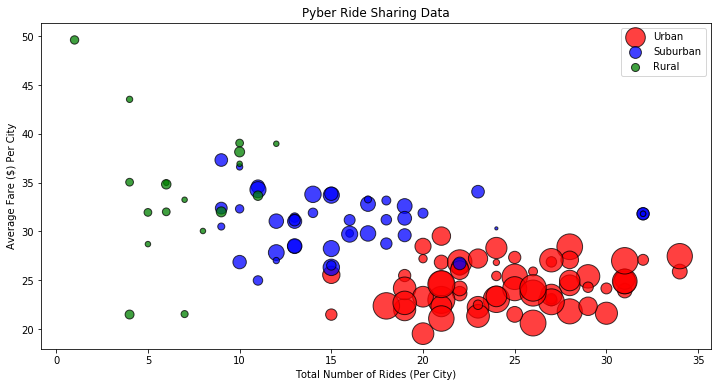

In [13]:
# Plot Urban City/Rides summary
plt.figure(figsize=(12,6))
plt.scatter(x = urban_summary['total rides per city'],
            y = urban_summary['average fare'],
            s = urban_summary['driver_count'] * 10,
            c = 'red',
            marker="o", edgecolors="black",
            label = "Urban",
            alpha = 0.75)

# Plot Suburban City/Rides summary
plt.scatter(x = suburban_summary['total rides per city'],
            y = suburban_summary['average fare'],
            s = suburban_summary['driver_count'] * 10,
            c = 'blue',
            marker="o", edgecolors="black",
            label = "Suburban",
            alpha = 0.75)

# Plot Rural City/Rides summary
plt.scatter(x = rural_summary['total rides per city'],
            y = rural_summary['average fare'],
            s = rural_summary['driver_count'] * 10,
            c = 'green',
            marker="o", edgecolors="black",
            label = "Rural",
            alpha = 0.75)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) Per City")
plt.title("Pyber Ride Sharing Data")
plt.legend(loc='best')
plt.figure(figsize=(5,5))
plt.show()

In [14]:
city_type_fares = city_ride_pd.groupby('type', as_index=False)['fare'].sum()
total_fare = city_type_fares['fare'].sum()

# calculate % of Total Fares by City Type
city_type_fares['fare'] = city_type_fares['fare'] / total_fare * 100
city_type_fares

,type,fare
0,Rural,6.579786
1,Suburban,31.445750
2,Urban,61.974463


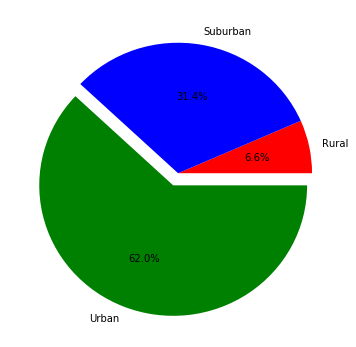

In [15]:
# plot pie chart of % of Total Fares by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
plt.pie(city_type_fares['fare'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_fares['type'])
plt.show()

In [16]:
# Calculate % of Total Rides by City Type
city_type_rides = city_ride_pd.groupby('type', as_index=False)['ride_id'].count()
total_rides = city_type_rides['ride_id'].sum()

# calculate % of Total Fares by City Type
city_type_rides['ride_id'] = city_type_rides['ride_id'] / total_rides * 100
city_type_rides = city_type_rides.rename(columns={'ride_id': 'total_ries_per_city_type'})
city_type_rides

,type,total_ries_per_city_type
0,Rural,5.193187
1,Suburban,27.295388
2,Urban,67.511425


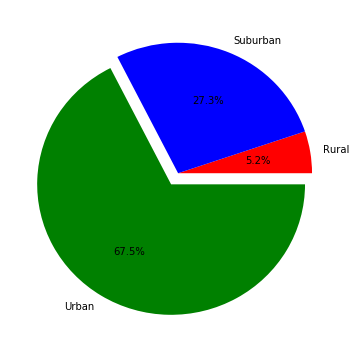

In [17]:
# plot pie chart of % of Total Rides by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
plt.pie(city_type_rides['total_ries_per_city_type'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_rides['type'])
plt.show()

In [20]:
# calculate % of Total Drivers by City Type
city_type_drivers = city_data_pd.groupby('type', as_index=False)['driver_count'].sum()
total_drivers = city_type_drivers['driver_count'].sum()

# calculate % of Total Drivers by City Type
city_type_drivers['driver_count'] = city_type_drivers['driver_count'] / total_drivers * 100
city_type_drivers

,type,driver_count
0,Rural,3.105405
1,Suburban,19.050463
2,Urban,77.844133


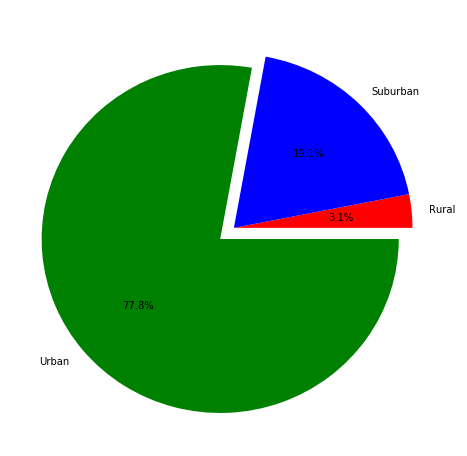

In [21]:
# plot pie chart of % of Total Drivers by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(8,8))
plt.pie(city_type_drivers['driver_count'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_drivers['type'])
plt.show()